<a href="https://colab.research.google.com/github/sukritganesh/PytorchDemos/blob/main/Basic_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Creating and Visualizing The Dataset

In [ ]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y).reshape((n_pts, 1))

In [ ]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

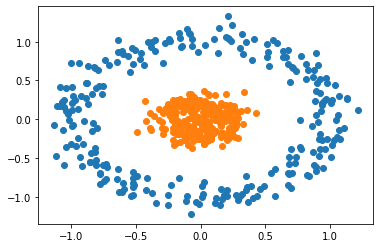

In [ ]:
scatter_plot()

# The Model

The model class.

In [ ]:
class Model(nn.Module):
  def __init__(self, input_size=2, hidden1_size=5, output_size=1):
    super().__init__()
    self.linear1 = nn.Linear(input_size, hidden1_size)
    self.linear2 = nn.Linear(hidden1_size, output_size)

  def forward(self, x):
    out = self.linear1(x)
    out = torch.sigmoid(out)
    out = self.linear2(out)
    out = torch.sigmoid(out)
    return out

  def predict(self, x):
    pred = self.forward(x)
    if (pred >= 0.5):
      return 1
    else:
      return 0

Creating the model, criterion and optimizer.

In [ ]:
# set manual seed for replication of initial weights
torch.manual_seed(2)

model = Model()
# Cross Entropy Loss
criterion = nn.BCELoss()
# Adam optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

print('Initial parameters:')
print(list(model.parameters()))

Initial parameters:
[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717],
        [ 0.1614, -0.6260]], requires_grad=True), Parameter containing:
tensor([ 0.0929,  0.0470, -0.1555,  0.5782,  0.0472], requires_grad=True), Parameter containing:
tensor([[ 0.1854,  0.1893, -0.2638, -0.1719,  0.4301]], requires_grad=True), Parameter containing:
tensor([-0.4380], requires_grad=True)]


# Training the Neural Network

In [ ]:
epochs = 1000
losses = []

# Note: x_data contains data points, y_data contains labels

for i in range(epochs):
  # Feed data through model
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)

  # Calculate gradients, step
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Bookkeeping
  if (not (i + 1) % 100):
    print('Epoch:', i+1, '/', epochs, '| Loss:', loss.item())
  losses.append(loss.item())

Epoch: 100 / 1000 | Loss: 0.04700670763850212
Epoch: 200 / 1000 | Loss: 0.015103199519217014
Epoch: 300 / 1000 | Loss: 0.008849398232996464
Epoch: 400 / 1000 | Loss: 0.006160352844744921
Epoch: 500 / 1000 | Loss: 0.00428162794560194
Epoch: 600 / 1000 | Loss: 0.0032188163604587317
Epoch: 700 / 1000 | Loss: 0.0026061818934977055
Epoch: 800 / 1000 | Loss: 0.0021816310472786427
Epoch: 900 / 1000 | Loss: 0.0018650357378646731
Epoch: 1000 / 1000 | Loss: 0.0016183843836188316


Plotting the results.

Text(0.5, 0, 'Epoch')

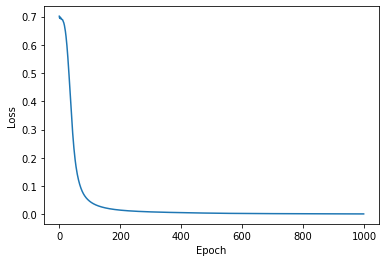

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

# Testing the Model

In [ ]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) - 0.25, max(X[:, 0]) + 0.25)
  y_span = np.linspace(min(X[:, 1]) - 0.25, max(X[:, 1]) + 0.25)
  xx, yy = np.meshgrid(x_span, y_span) 
  grid = np.c_[xx.ravel(), yy.ravel()]  # flatten, create grid
  grid = torch.Tensor(grid)             # convert to tensor
  pred_func = model.forward(grid)       # run points in grid through model
  z = pred_func.view(xx.shape).detach().numpy()
  plt.contourf(xx, yy, z)

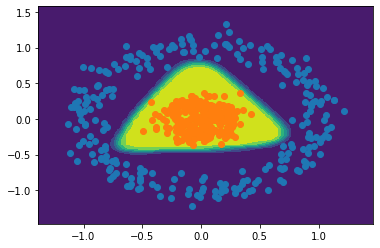

In [ ]:
plot_decision_boundary(X, y)
scatter_plot()

Testing Individual Points

Prediction is 1


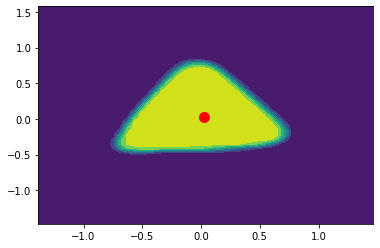

In [ ]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
pred = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color='red')
print('Prediction is', pred)
plot_decision_boundary(X, y)